                                            Project Title: Credit Card Fraud Detection

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv')
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [4]:
df.shape

(5000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [6]:
df.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


In [7]:
categorical_col=df.select_dtypes('O').columns
categorical_col

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender',
       'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [8]:
for col in categorical_col:
    print(f"{col}\t{df[col].unique()}\n")


Transaction_ID	['W963UK57' 'V606KV56' 'R531NU70' ... 'S458OS59' 'E863PD98' 'D501WH15']

Card_Type	['Mastercard' 'American Express' 'Visa' 'RuPay' nan]

Merchant_Category	['Utility bill' 'Retail' 'Transportation' 'Online Shopping'
 'Entertainment' 'Education' 'Dining' 'Healthcare' nan]

Transaction_DateTime	['2020-01-01 09:43:17' '2020-01-03 16:26:13' '2020-01-04 03:40:49' ...
 '2023-12-30 07:06:38' '2023-12-30 07:50:02' '2023-12-30 11:41:36']

Location	['Patna' 'Surat' 'Lucknow' 'Mumbai' 'Kolkata' 'Bengaluru' 'Jaipur'
 'Hyderabad' 'Kochi' 'Chennai' 'Pune' 'Ahmedabad' 'Delhi']

Region	['East' 'West' 'North' 'South']

Cardholder_Gender	['Female' 'Male' nan]

Device_Type	['Unknown' 'Desktop' 'Mobile' 'Point-of-Sale Terminal'
 'Contactless Payment Device' nan]

Day_of_Week	['Wednesday' 'Friday' 'Saturday' 'Sunday' 'Tuesday' 'Thursday' 'Monday']

Is_Fraudulent	['No' 'Yes']



In [9]:
col_to_distribute=['Card_Type','Merchant_Category','Location','Region','Cardholder_Gender','Is_Fraudulent']
col_to_distribute

['Card_Type',
 'Merchant_Category',
 'Location',
 'Region',
 'Cardholder_Gender',
 'Is_Fraudulent']

                                                    1) Exploratory Data Analysis (EDA):

UNIVARIATE


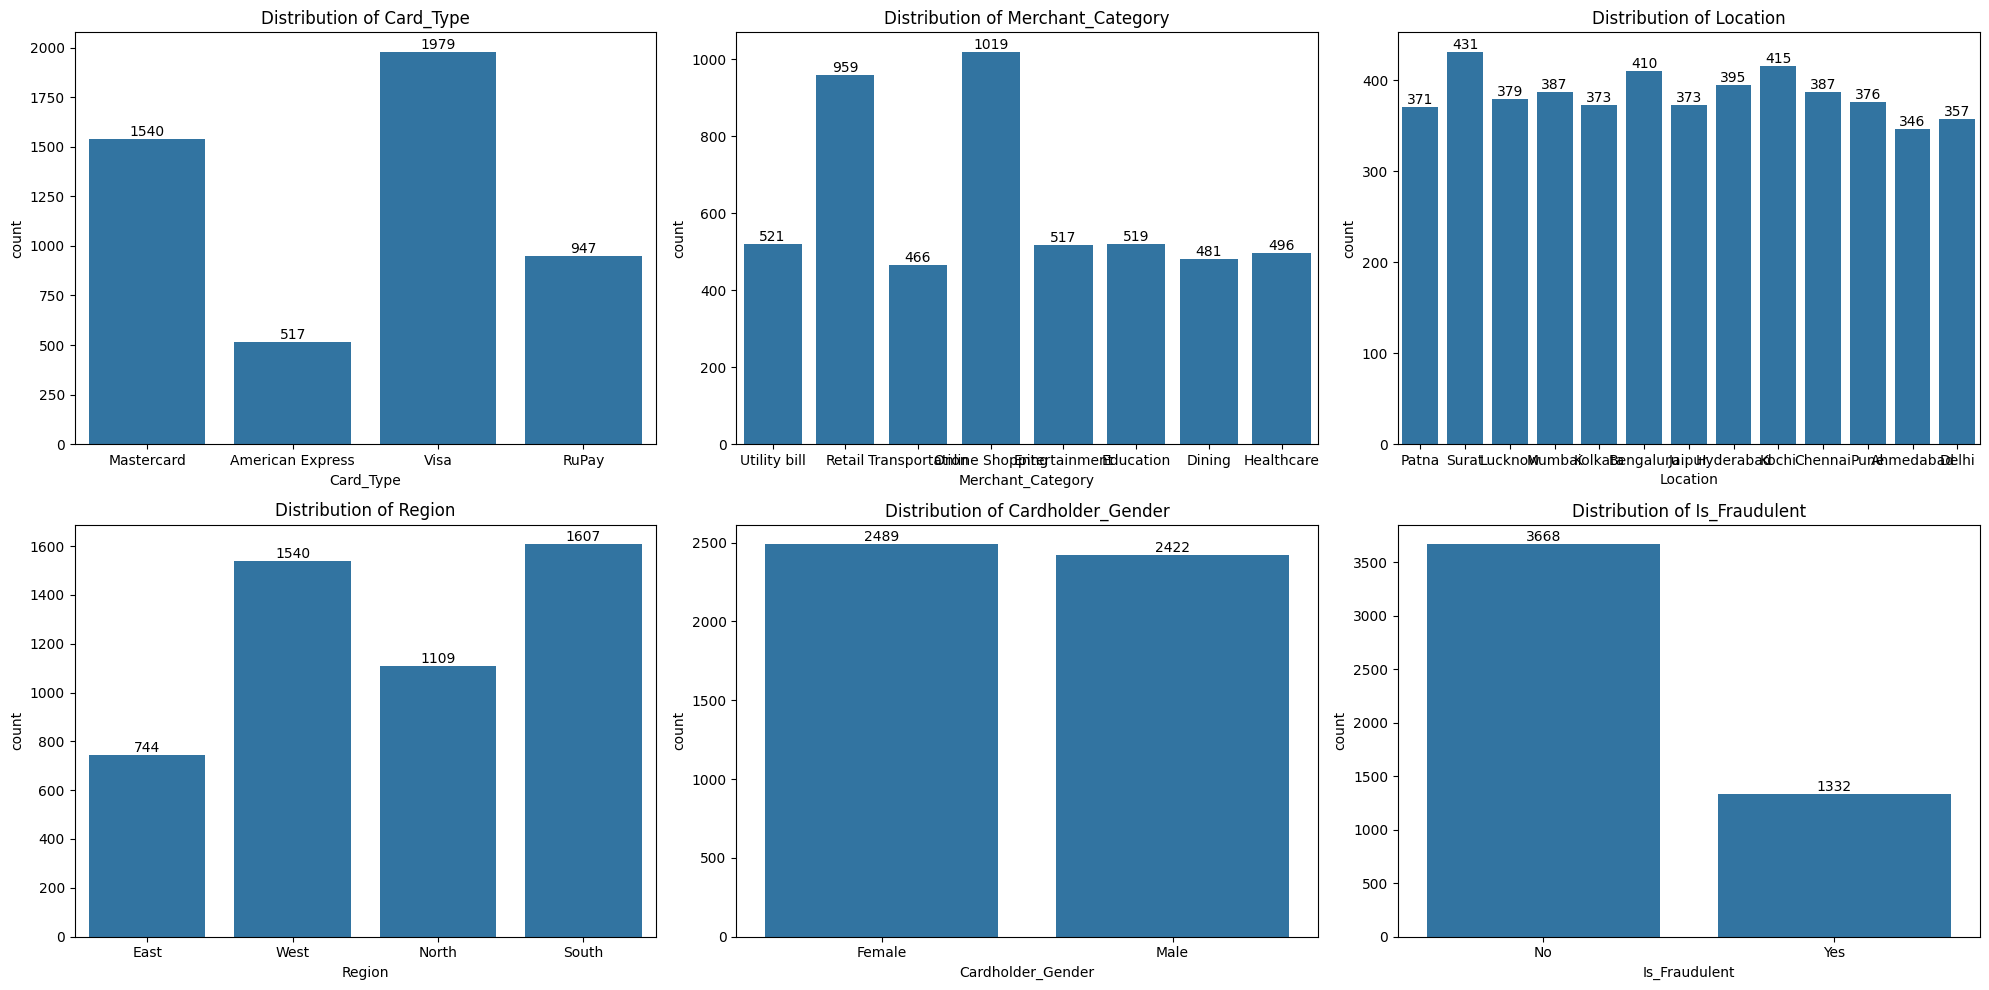

In [10]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axes=axes.flatten()
for col,axis in zip(col_to_distribute,axes):
    sns.countplot(data=df,x=col,ax=axis)
    axis.set_title(f'Distribution of {col}')
    axis.bar_label(axis.containers[0])
plt.tight_layout()
plt.show()

    

In [11]:
numerical_col=df.select_dtypes(exclude='O').columns
numerical_col

Index(['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit'],
      dtype='object')

In [12]:
for col in numerical_col:
    print(f"mean of {col}:{df[col].mean():.2f}")
    print(f"median of {col}:{df[col].median():.2f}")
    print(f"mode of {col}:{df[col].mode()[0]:.2f}")
    print(f"skewness of {col}:{df[col].skew():.2f}")
    print(f"standard deviation of {col}:{df[col].std():.2f}")
    print(f"variance of {col}:{df[col].var():.2f}\n")

mean of Transaction_Amount:74668.00
median of Transaction_Amount:60922.00
mode of Transaction_Amount:25207.00
skewness of Transaction_Amount:0.97
standard deviation of Transaction_Amount:43089.05
variance of Transaction_Amount:1856665852.71

mean of Cardholder_Age:49.11
median of Cardholder_Age:49.00
mode of Cardholder_Age:26.00
skewness of Cardholder_Age:-0.01
standard deviation of Cardholder_Age:18.40
variance of Cardholder_Age:338.51

mean of Cardholder_Monthly_Income:137353.82
median of Cardholder_Monthly_Income:131833.00
mode of Cardholder_Monthly_Income:35555.00
skewness of Cardholder_Monthly_Income:0.43
standard deviation of Cardholder_Monthly_Income:69471.62
variance of Cardholder_Monthly_Income:4826306405.02

mean of Cardholder_Average_Spend:63058.34
median of Cardholder_Average_Spend:49547.94
mode of Cardholder_Average_Spend:51885.56
skewness of Cardholder_Average_Spend:1.16
standard deviation of Cardholder_Average_Spend:40056.99
variance of Cardholder_Average_Spend:160456242

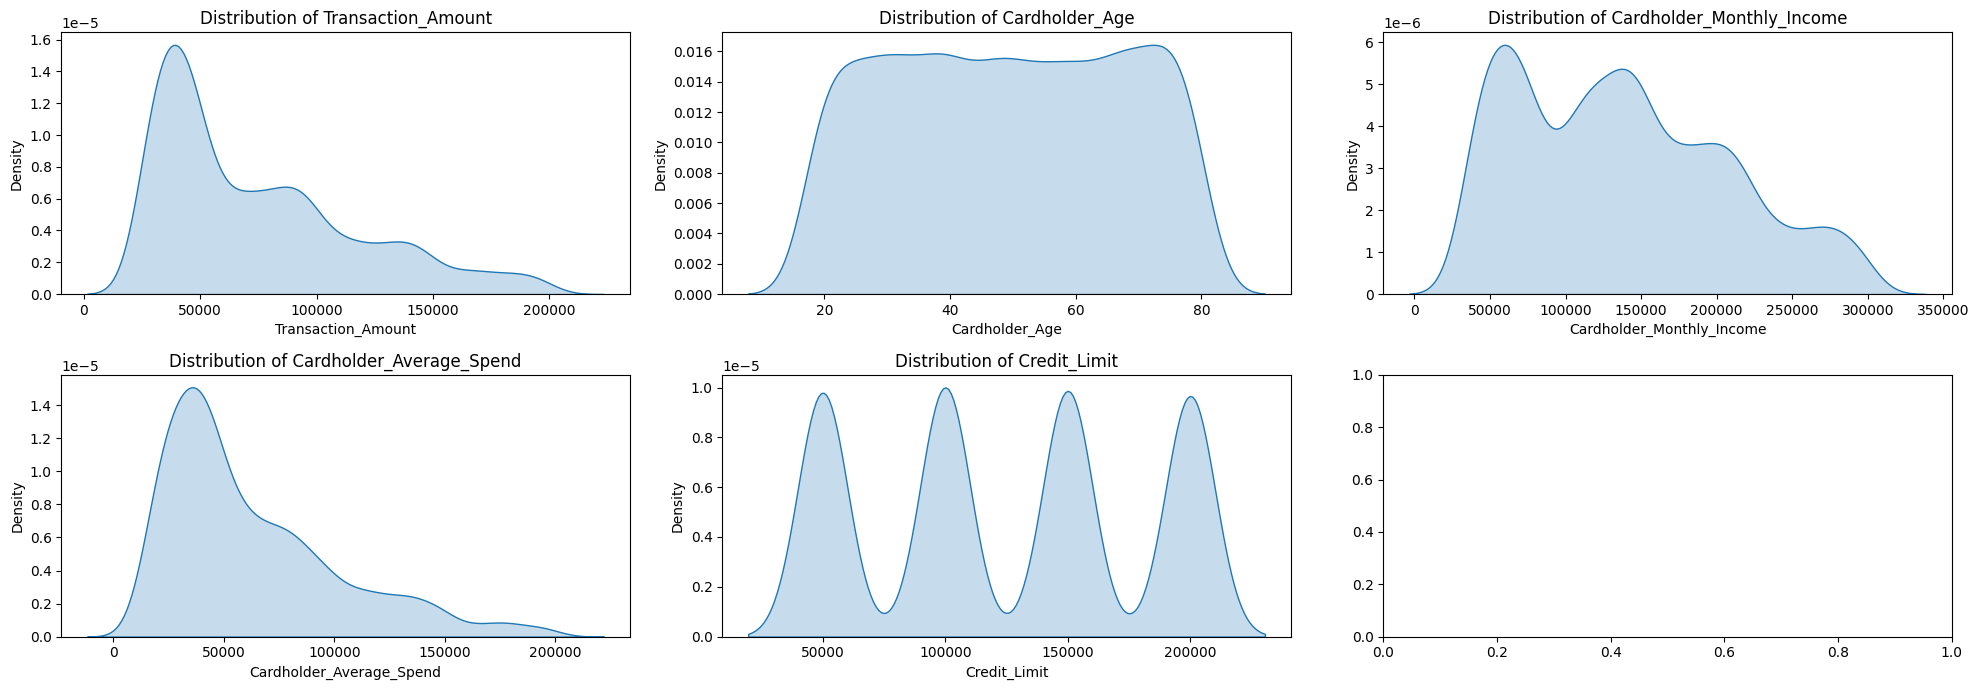

In [13]:
fig,axes=plt.subplots(nrows=2,ncols=3, figsize=(20,7))
axes=axes.flatten()
for col, axis in zip(numerical_col,axes):
  sns.kdeplot(data=df,x=col,ax=axis,fill=True)
  axis.set_title(f'Distribution of {col}')


plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'Location', 'Region',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

BIVARIATE ANALYSIS

<Axes: xlabel='Cardholder_Gender', ylabel='Cardholder_Average_Spend'>

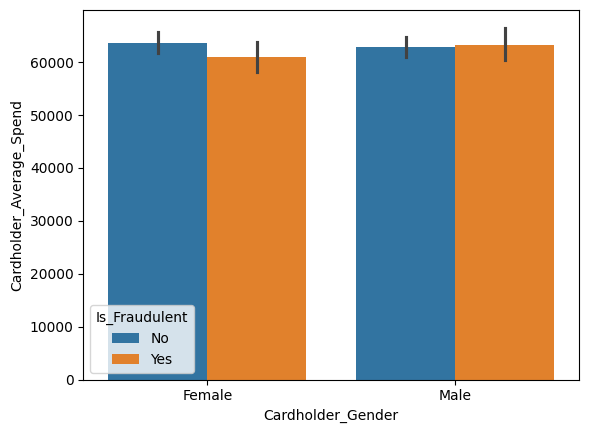

In [15]:
sns.barplot(data=df,x='Cardholder_Gender',y='Cardholder_Average_Spend',hue='Is_Fraudulent')

<Axes: xlabel='Region', ylabel='Transaction_Amount'>

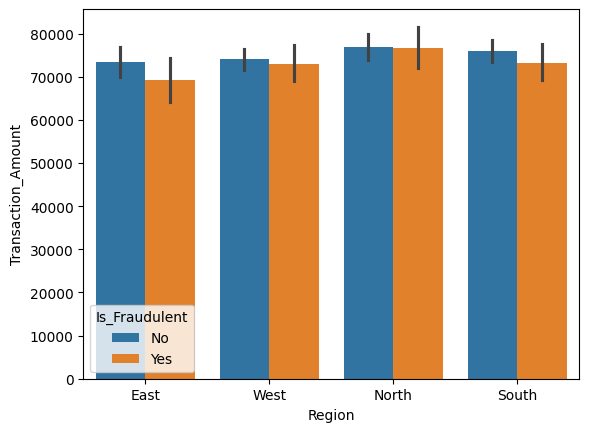

In [16]:
sns.barplot(data=df,x='Region',y='Transaction_Amount',hue='Is_Fraudulent')

<Axes: xlabel='Cardholder_Monthly_Income', ylabel='Cardholder_Average_Spend'>

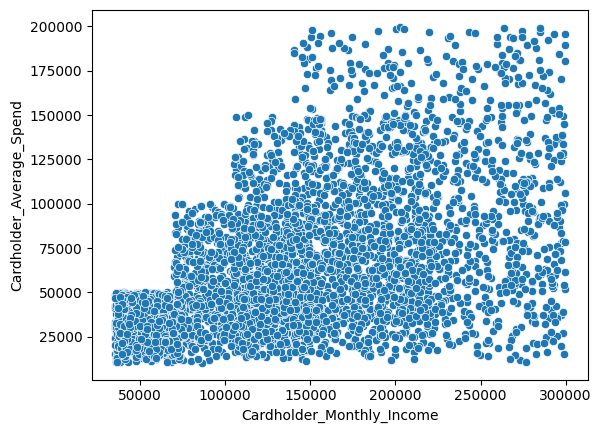

In [17]:
sns.scatterplot(data=df,x='Cardholder_Monthly_Income',y="Cardholder_Average_Spend")

<Axes: xlabel='Card_Type', ylabel='Transaction_Amount'>

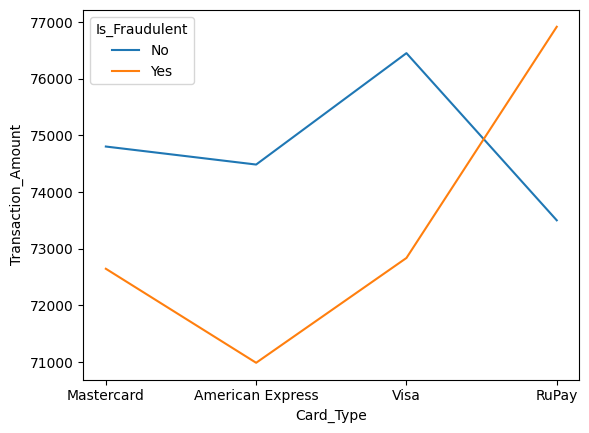

In [18]:
sns.lineplot(data=df,x='Card_Type',y="Transaction_Amount",errorbar=None,hue="Is_Fraudulent")

<Axes: xlabel='Region', ylabel='Transaction_Amount'>

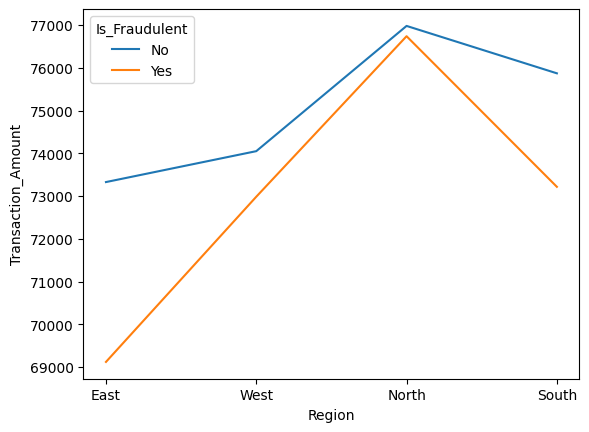

In [19]:
sns.lineplot(data=df,x='Region',y="Transaction_Amount",errorbar=None,hue="Is_Fraudulent")

<Axes: xlabel='Cardholder_Monthly_Income', ylabel='Transaction_Amount'>

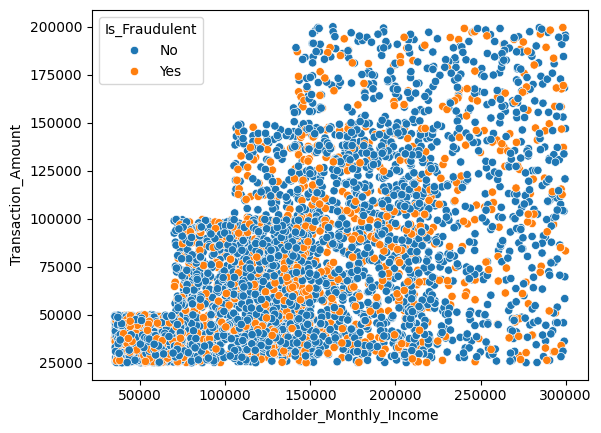

In [20]:
sns.scatterplot(data=df,x='Cardholder_Monthly_Income',y="Transaction_Amount",hue="Is_Fraudulent")

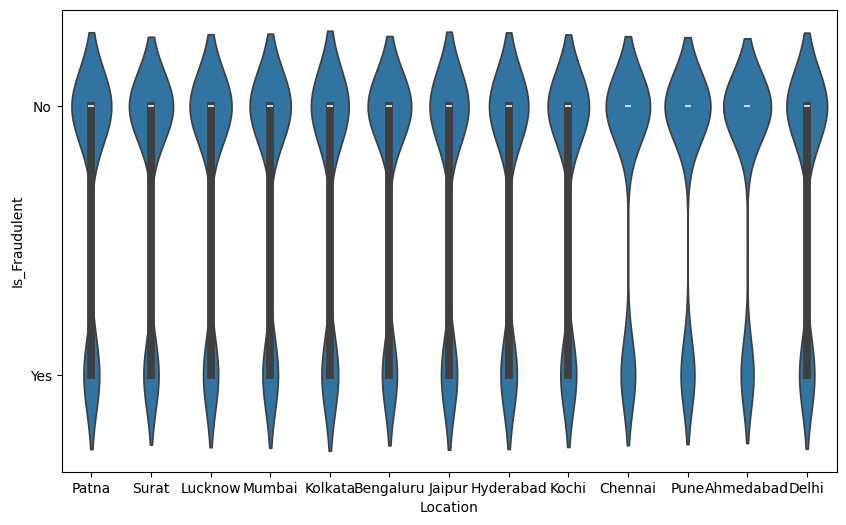

In [21]:
plt.figure(figsize=(10,6))
#sns.violinplot(x='Location', y='Device_Type', data=df,hue="Is_Fraudulent")
sns.violinplot(data=df,x='Location', y="Is_Fraudulent")
plt.show()

<Axes: xlabel='Transaction_Amount'>

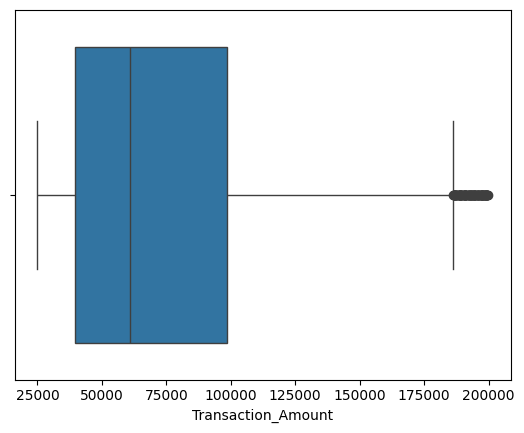

In [22]:
sns.boxplot(x=df['Transaction_Amount'])

<Axes: xlabel='Cardholder_Average_Spend'>

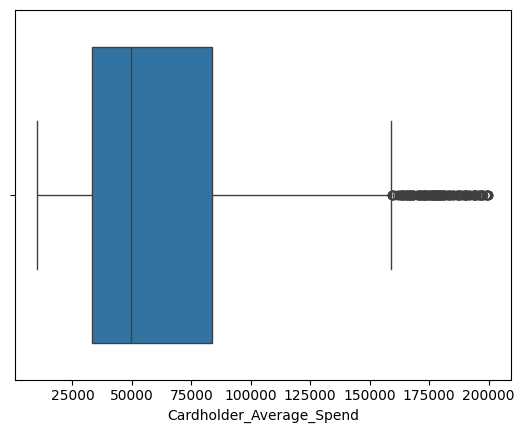

In [23]:
sns.boxplot(x=df['Cardholder_Average_Spend'])

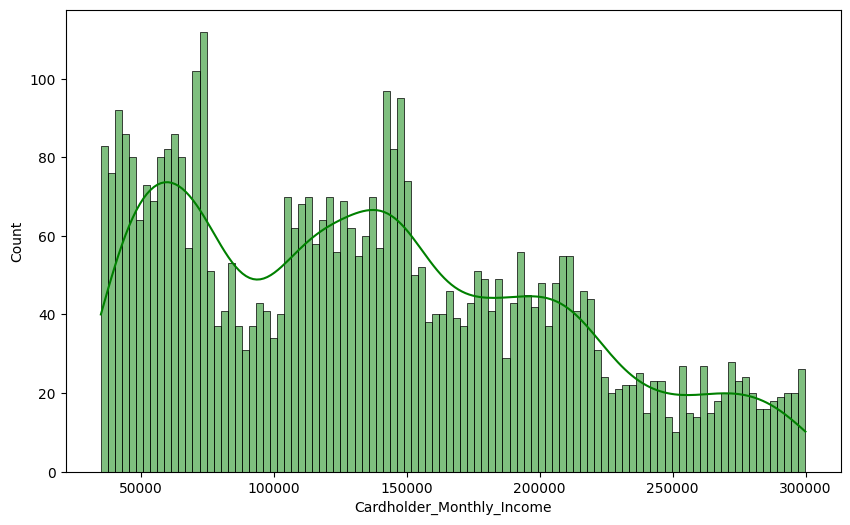

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df['Cardholder_Monthly_Income'],bins=100,kde=True,color='green')
plt.show()

Multivariate

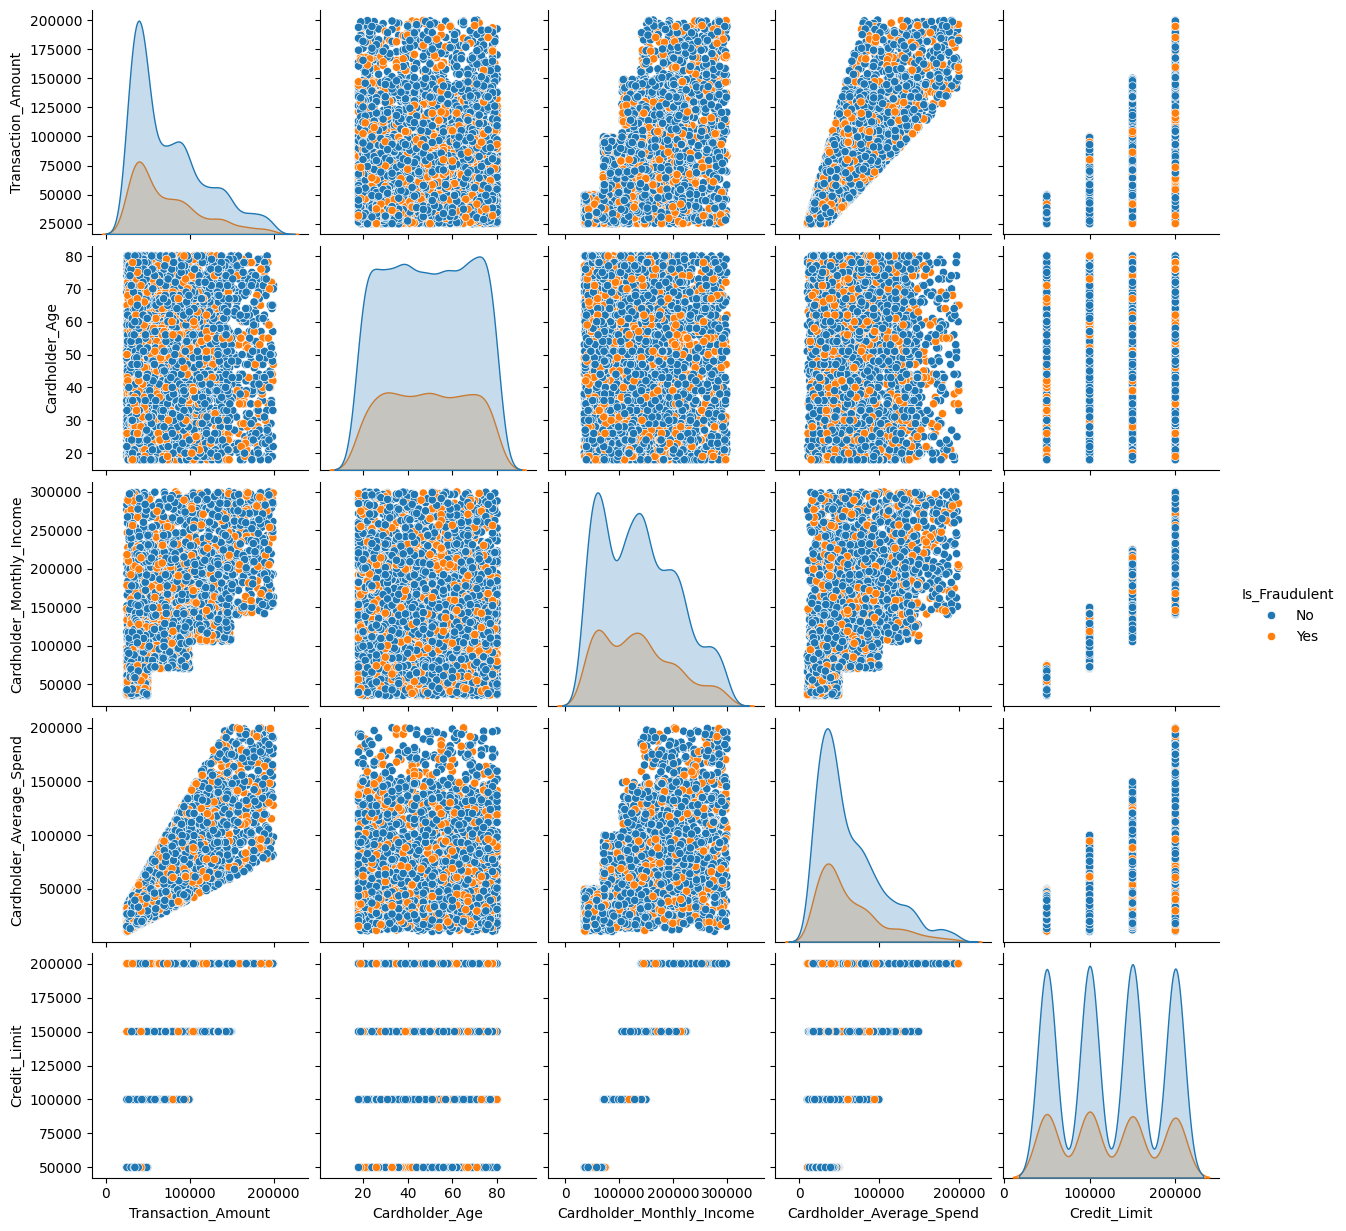

In [25]:
sns.pairplot(df, hue='Is_Fraudulent')
plt.show()

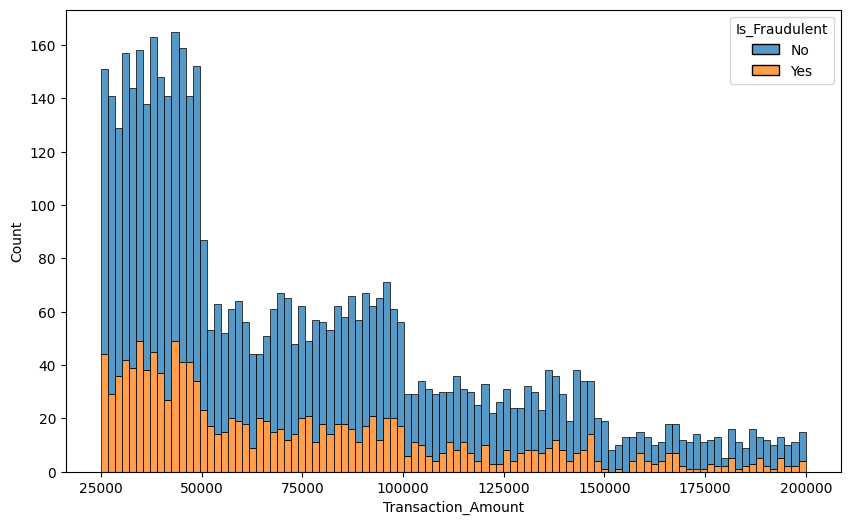

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Transaction_Amount',bins=100,hue='Is_Fraudulent',multiple='stack')
plt.show()

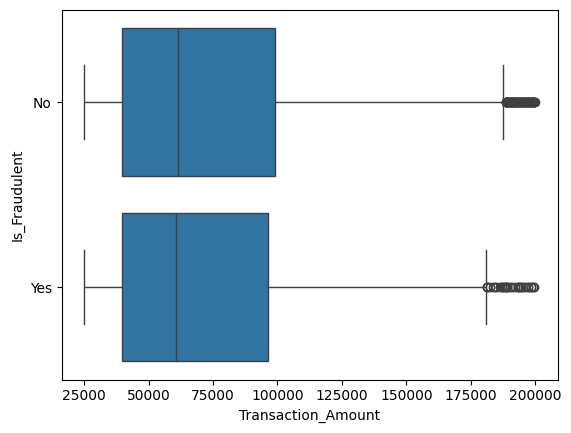

In [27]:
sns.boxplot(data=df,x='Transaction_Amount',y='Is_Fraudulent')
plt.show()

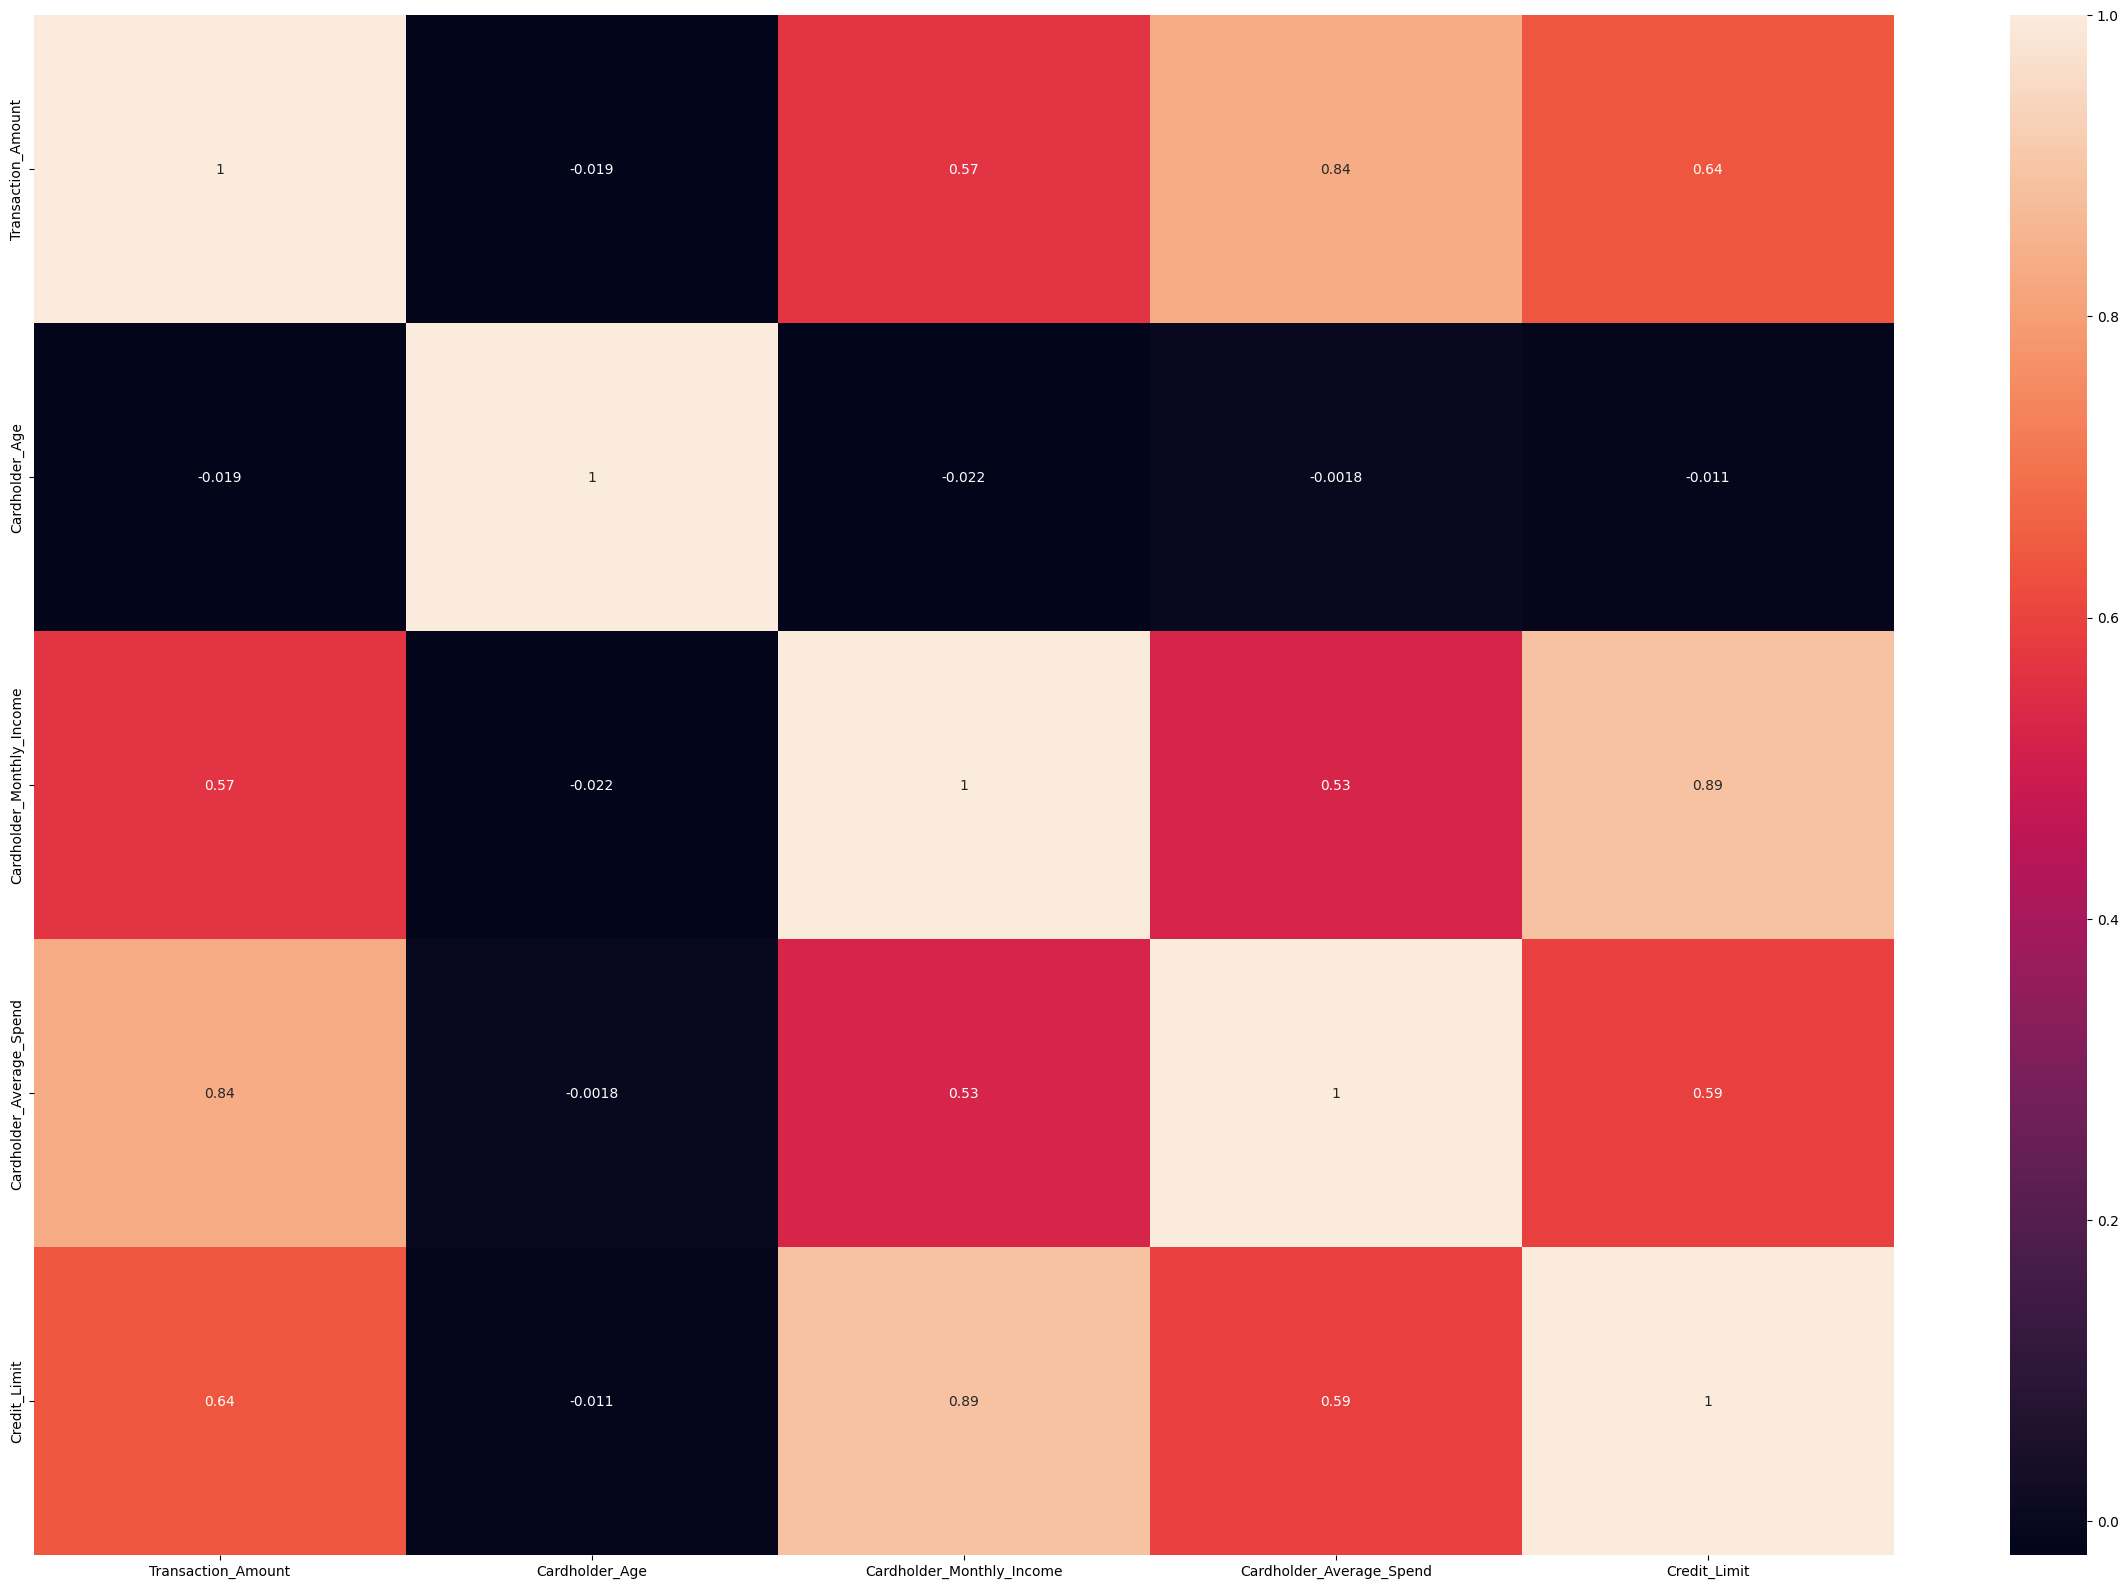

In [28]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [29]:
corr_matrix=df[numerical_col].corr()
corr_matrix

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
Transaction_Amount,1.000000,-0.018885,0.567976,0.835735,0.639278
Cardholder_Age,-0.018885,1.000000,-0.022468,-0.001833,-0.011339
Cardholder_Monthly_Income,0.567976,-0.022468,1.000000,0.525069,0.888672
Cardholder_Average_Spend,0.835735,-0.001833,0.525069,1.000000,0.590412
Credit_Limit,0.639278,-0.011339,0.888672,0.590412,1.000000


By EDA analysis 

Card type visa has more count.

Region south and west is huge in count.

Merchant type retail and shopping is more in count.

Card holder average spend and transaction amount has positive skew.

Rupay has more fraudulent result.

North zone is more in fraudulent .

Card holder average spend and transaction amount has ouliers above max level.

Lower count in transaction amount includes more fraudulent .

By heat map cardholder age with other numerical columns has bad relationship.

                                                Data Preprocessing - Data Cleaning

In [30]:
df.isnull().sum()

Transaction_ID                 0
Card_Type                     17
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [31]:
df['Card_Type']=df['Card_Type'].fillna(df['Card_Type'].mode()[0])

In [32]:
df['Merchant_Category']=df['Merchant_Category'].fillna(df['Merchant_Category'].mode()[0])

In [33]:
df['Transaction_Amount']=df['Transaction_Amount'].fillna(df['Transaction_Amount'].median())

In [34]:
df['Cardholder_Age']=df['Cardholder_Age'].fillna(df['Cardholder_Age'].mean())

In [35]:
df['Cardholder_Gender']=df['Cardholder_Gender'].fillna(df['Cardholder_Gender'].mode()[0])

In [36]:
df['Cardholder_Monthly_Income']=df['Cardholder_Monthly_Income'].fillna(df['Cardholder_Monthly_Income'].mean())

In [37]:
df['Cardholder_Average_Spend']=df['Cardholder_Average_Spend'].fillna(df['Cardholder_Average_Spend'].median())

In [38]:
df['Credit_Limit']=df['Credit_Limit'].fillna(df['Credit_Limit'].mean())

In [39]:
df['Device_Type']=df['Device_Type'].fillna(df['Device_Type'].mode()[0])

In [40]:
df.isnull().sum()

Transaction_ID               0
Card_Type                    0
Merchant_Category            0
Transaction_Amount           0
Transaction_DateTime         0
Location                     0
Region                       0
Cardholder_Age               0
Cardholder_Gender            0
Cardholder_Monthly_Income    0
Cardholder_Average_Spend     0
Credit_Limit                 0
Device_Type                  0
Day_of_Week                  0
Is_Fraudulent                0
dtype: int64

In [41]:
numerical_col

Index(['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit'],
      dtype='object')

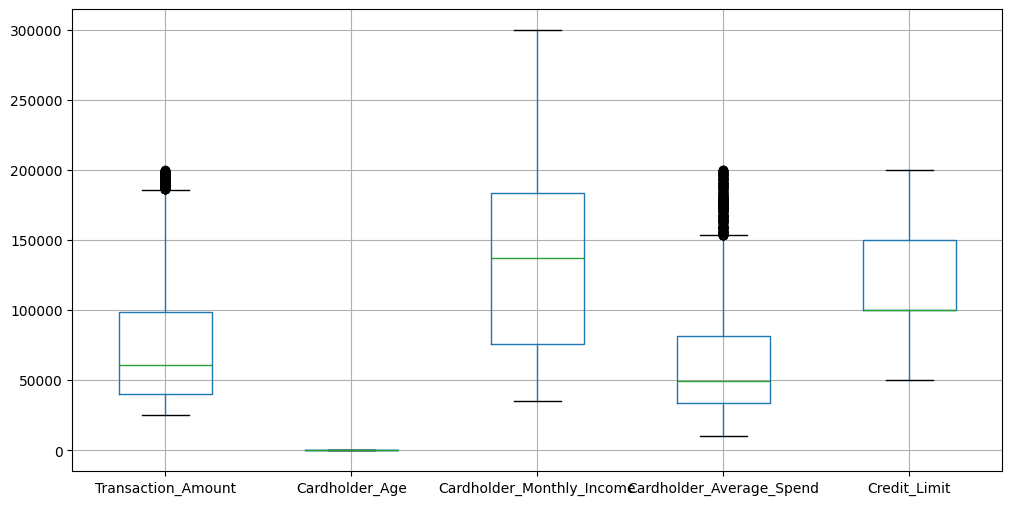

In [42]:

plt.figure(figsize=(12,6))
df.boxplot(['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit'])
plt.show()

Transaction Amount and Card holder average spend have outliers

Handling outliers

In [43]:
Q1=df['Transaction_Amount'].quantile(0.25)
Q3=df['Transaction_Amount'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(IQR*1.5)
upper_bound=Q3+(IQR*1.5)


In [44]:
df=df[(df['Transaction_Amount']>lower_bound)&(df['Transaction_Amount']<upper_bound)]

In [45]:
Q1=df['Cardholder_Average_Spend'].quantile(0.25)
Q3=df['Cardholder_Average_Spend'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(IQR*1.5)
upper_bound=Q3+(IQR*1.5)

In [46]:
df=df[(df['Cardholder_Average_Spend']>lower_bound)&(df['Cardholder_Average_Spend']<upper_bound)]

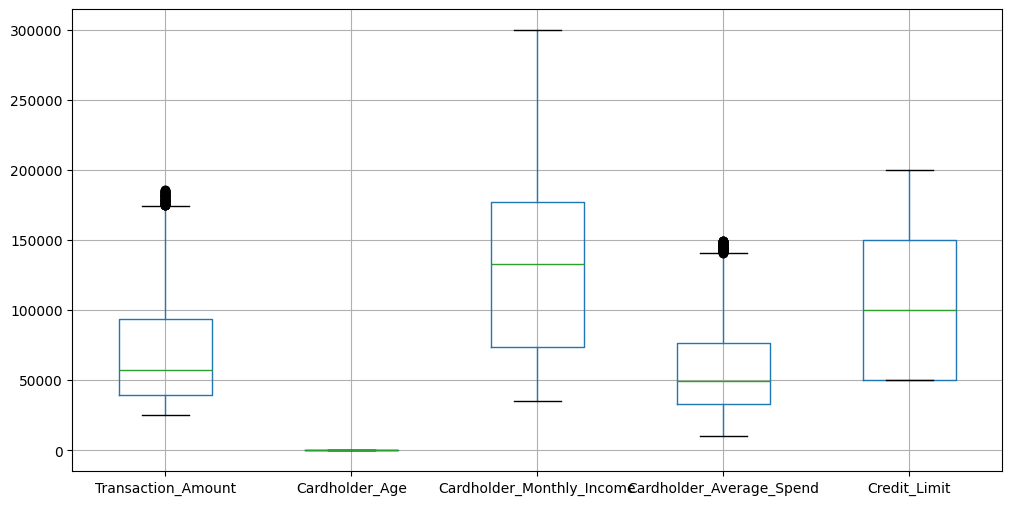

In [47]:
plt.figure(figsize=(12,6))
df.boxplot(['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit'])
plt.show()

In [48]:
df.shape

(4746, 15)

In [49]:
df[numerical_col].skew()

Transaction_Amount           0.935180
Cardholder_Age              -0.010689
Cardholder_Monthly_Income    0.494859
Cardholder_Average_Spend     0.950315
Credit_Limit                 0.091207
dtype: float64

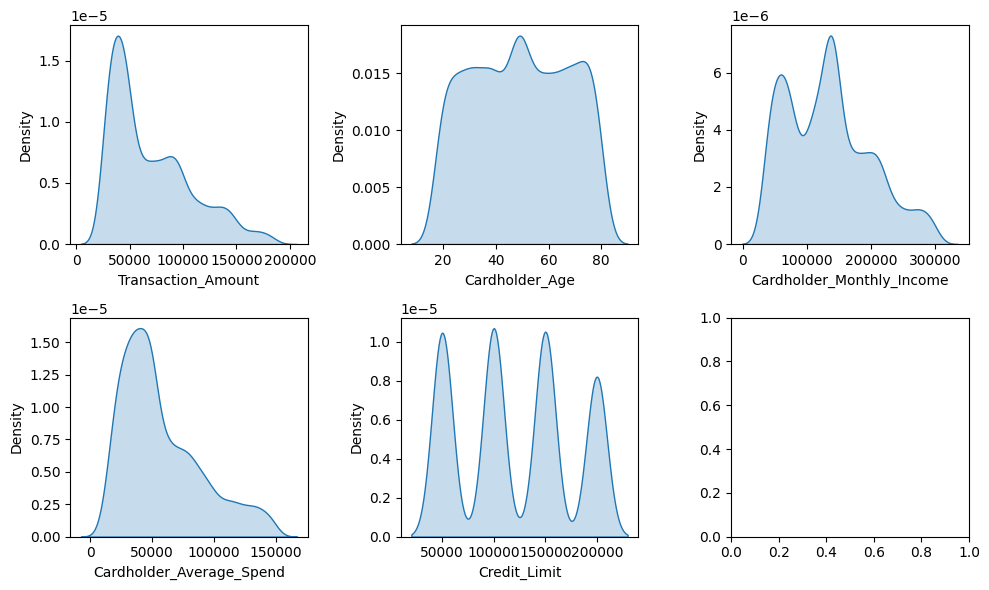

In [50]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,6))
axes=axes.flatten()
for index,col in enumerate(numerical_col):
    sns.kdeplot(data=df,x=col,ax=axes[index],fill=True)
plt.tight_layout()
plt.show()

Transaction Amount and Card holder average spend is moderatey positive skewed.

Cardholder_Age, Cardholder_Monthly_Income, Credit_Limit are nearby to 0 so Approximately symmetric.

Squareroot Transformation

In [51]:
import numpy as np

In [52]:
df['Transaction_Amount']=np.sqrt(df['Transaction_Amount'])

In [53]:
df['Transaction_Amount'].skew()

np.float64(0.5588374644889588)

In [54]:
df['Cardholder_Average_Spend']=df['Cardholder_Average_Spend']**0.5

In [55]:
df['Cardholder_Average_Spend'].skew()

np.float64(0.46502570208254723)

                                                        ENCODING                                                                    

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le=LabelEncoder()
for col in categorical_col:
    df[col]=le.fit_transform(df[col])
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,4191,1,7,164.966663,0,10,0,23.0,0,94632.0,190.708285,100000.0,4,6,0
1,3930,0,5,289.751618,1,12,3,49.0,1,148118.0,298.628733,150000.0,1,0,0
4,1835,2,5,284.903492,2,8,1,37.0,0,174470.0,229.593314,200000.0,2,2,0
5,1592,2,2,363.205176,3,9,3,80.0,1,166671.0,283.537370,150000.0,3,2,0
6,4410,3,5,372.875314,4,12,3,33.0,1,171991.0,290.199483,150000.0,1,3,1


In [58]:
corr_matrix=df.corr()
corr_matrix

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
Transaction_ID,1.000000,0.010016,-0.010555,0.011969,0.016922,0.016659,0.017928,0.009543,0.002112,0.000121,0.015736,0.004772,0.002952,0.006474,0.018804
Card_Type,0.010016,1.000000,-0.013905,0.017852,0.026940,-0.006374,-0.019918,-0.008109,-0.023607,0.009335,0.006239,0.011610,0.013136,0.025967,0.005817
Merchant_Category,-0.010555,-0.013905,1.000000,-0.008127,-0.019980,-0.000239,0.001603,-0.013016,-0.001524,-0.009114,-0.009234,-0.007419,0.013942,0.015344,-0.013524
Transaction_Amount,0.011969,0.017852,-0.008127,1.000000,0.013897,-0.037211,-0.004755,-0.009939,-0.018230,0.516025,0.801769,0.598891,0.023441,-0.007800,-0.018150
Transaction_DateTime,0.016922,0.026940,-0.019980,0.013897,1.000000,-0.019245,-0.019799,-0.004167,-0.005668,0.000179,0.005207,0.012923,0.005809,-0.002936,-0.013376
Location,0.016659,-0.006374,-0.000239,-0.037211,-0.019245,1.000000,0.030398,-0.004928,0.003162,-0.005241,-0.036893,-0.010102,0.016927,-0.000609,0.014161
Region,0.017928,-0.019918,0.001603,-0.004755,-0.019799,0.030398,1.000000,0.003505,0.002413,0.020983,0.000579,0.009120,-0.014502,-0.004866,-0.036050
Cardholder_Age,0.009543,-0.008109,-0.013016,-0.009939,-0.004167,-0.004928,0.003505,1.000000,0.004154,-0.017750,0.007720,-0.008259,0.019030,0.010652,-0.001563
Cardholder_Gender,0.002112,-0.023607,-0.001524,-0.018230,-0.005668,0.003162,0.002413,0.004154,1.000000,-0.014466,-0.008767,-0.025633,-0.011093,-0.014324,0.019073
Cardholder_Monthly_Income,0.000121,0.009335,-0.009114,0.516025,0.000179,-0.005241,0.020983,-0.017750,-0.014466,1.000000,0.457188,0.859891,0.016380,-0.005039,-0.022605


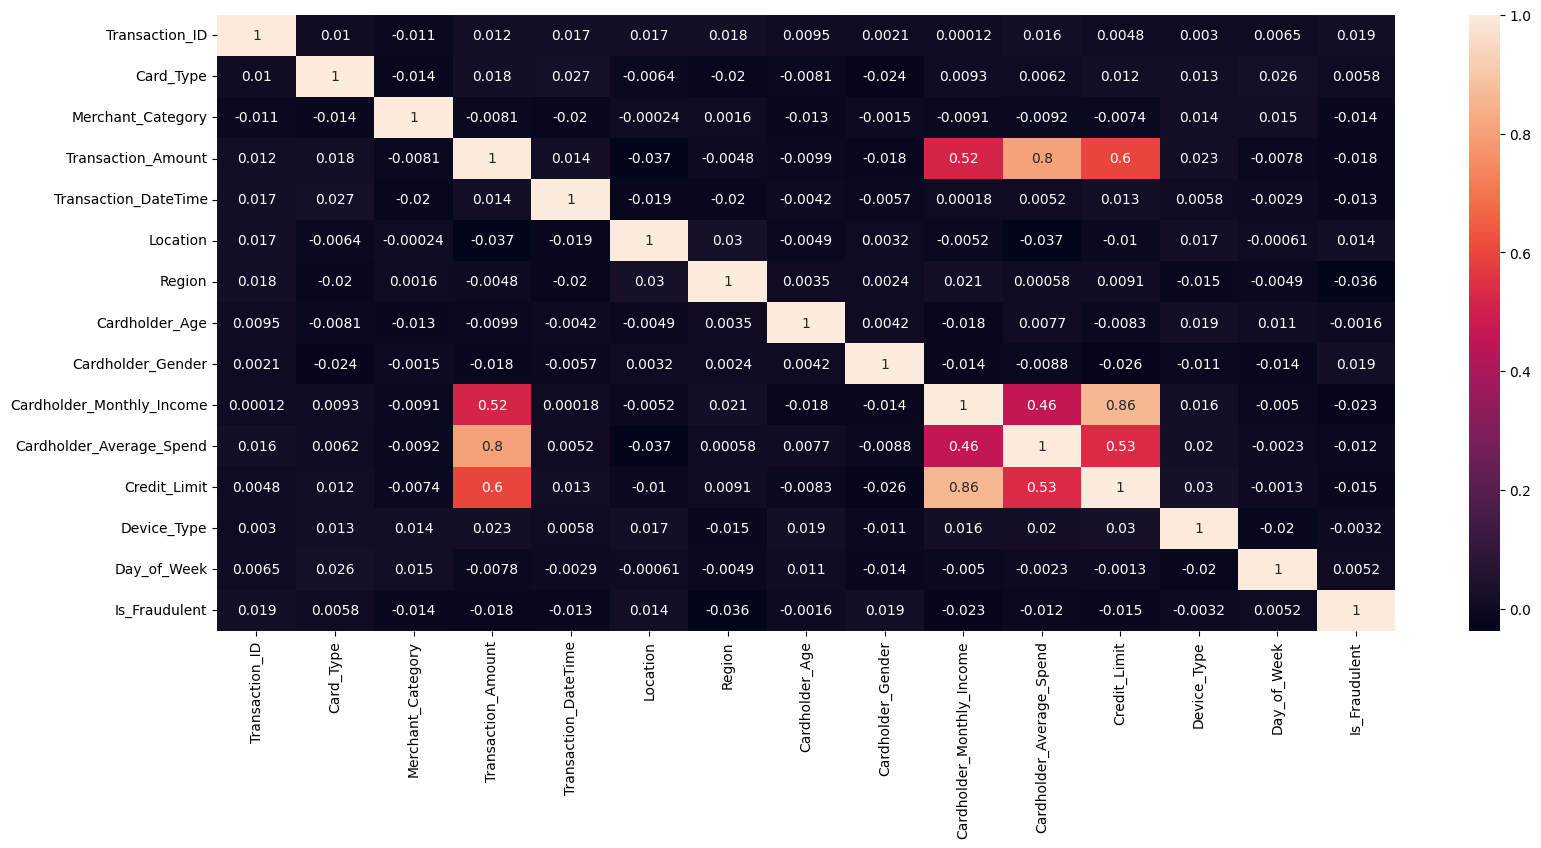

In [59]:
plt.figure(figsize=(19,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [60]:
high_corr=corr_matrix[(corr_matrix.abs()>0.5)&(corr_matrix.abs()<0.7)]
high_corr.columns.sort_values(ascending=False)

Index(['Transaction_ID', 'Transaction_DateTime', 'Transaction_Amount',
       'Region', 'Merchant_Category', 'Location', 'Is_Fraudulent',
       'Device_Type', 'Day_of_Week', 'Credit_Limit',
       'Cardholder_Monthly_Income', 'Cardholder_Gender',
       'Cardholder_Average_Spend', 'Cardholder_Age', 'Card_Type'],
      dtype='object')

In [61]:
from sklearn.feature_selection import SelectKBest,f_classif

In [62]:
x=df.drop(columns=['Transaction_ID','Is_Fraudulent'])
y=df['Is_Fraudulent']

In [63]:
x.shape

(4746, 13)

In [64]:
y.shape

(4746,)

In [65]:
selector=SelectKBest(score_func=f_classif,k=8)
x_new=selector.fit_transform(x,y)
feature_score=selector.scores_
print('selected 8 features :',x.columns[selector.get_support(indices=True)])

selected 8 features : Index(['Merchant_Category', 'Transaction_Amount', 'Transaction_DateTime',
       'Location', 'Region', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Credit_Limit'],
      dtype='object')


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x=df[['Merchant_Category', 'Transaction_Amount', 'Transaction_DateTime',
       'Location', 'Region', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Credit_Limit']]
y=df['Is_Fraudulent']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Actual Dataframe shape:",df.shape)
# Checking the shape of Train and Test sets
print("Train Data Shape (X_train, y_train):", x_train.shape, y_train.shape)
print("Test Data Shape (X_test, y_test):", x_test.shape, y_test.shape)

Actual Dataframe shape: (4746, 15)
Train Data Shape (X_train, y_train): (3796, 8) (3796,)
Test Data Shape (X_test, y_test): (950, 8) (950,)


                                                SCALING 

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

                                            LOGISTIC REGRESSION

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
classifier=LogisticRegression()
classifier.fit(x_train_scaled,y_train)
ypred=classifier.predict(x_test_scaled)

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [84]:
print("Accuracy score is ",accuracy)
print("confusion matrix is ",cm)
print("F1 score is ",f1)
print("precision score is ",pre)
print("recall score is",recal)
    

Accuracy score is  0.7410526315789474
confusion matrix is  [[704   0]
 [246   0]]
F1 score is  0.6308356138229491
precision score is  0.5491590027700831
recall score is 0.7410526315789474


                                            DECISION TREE CLASSIFIER

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
accuracy=[]

maxdepth=range(2,8)
for d in maxdepth:
    dp=DecisionTreeClassifier(max_depth=d)
    dp.fit(x_train_scaled,y_train)
    acc=dp.score(x_test_scaled,y_test)
    accuracy.append(acc)
    print("Max Depth:",d,"Accuracy",acc)

    

Max Depth: 2 Accuracy 0.7410526315789474
Max Depth: 3 Accuracy 0.7410526315789474
Max Depth: 4 Accuracy 0.7431578947368421
Max Depth: 5 Accuracy 0.7305263157894737
Max Depth: 6 Accuracy 0.7326315789473684
Max Depth: 7 Accuracy 0.7347368421052631


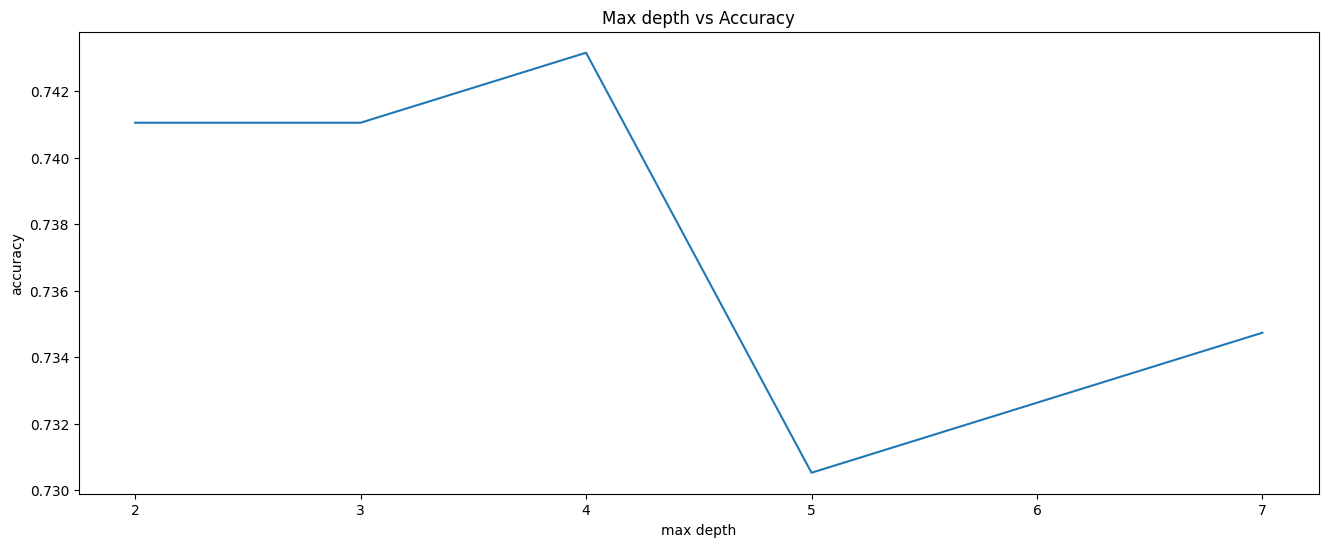

In [88]:
plt.figure(figsize=(16,6))
plt.plot(maxdepth,accuracy)
plt.xticks(maxdepth)
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.title("Max depth vs Accuracy")
plt.show()

MAX DEPTH 4 is chosen

In [95]:
model=DecisionTreeClassifier(max_depth=4)
model.fit(x_train_scaled,y_train)
accuracy=model.score(x_test_scaled,y_test)
print("Accuracy value for max depth 4 is",accuracy)


Accuracy value for max depth 4 is 0.7431578947368421


                                            K NEIGHBORS CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
accuracy=[]
k=range(1,11)
for n in k:
    classifier=KNeighborsClassifier(n_neighbors=n)
    classifier.fit(x_train_scaled,y_train)
    acc=classifier.score(x_test_scaled,y_test)
    accuracy.append(acc)
    print("k neighbor ",n,"accuracy is ",acc)
    

In [ ]:
best_k=accuracy.index(max(accuracy))+1
print("Best k value is ",best_k)

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(k,accuracy,color="blue",marker='o',linestyle="dashed",markerfacecolor="red",markersize=10)
plt.title("Accuracy vs k value")
plt.xticks(k)
plt.xlabel("k_value")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
k_model=KNeighborsClassifier(n_neighbors=10)
k_model.fit(x_train_scaled,y_train)
accuracy=k_model.score(x_test_scaled,y_test)
print("Accuracy value for best k value 10 is",accuracy)

                                                RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_estimators=50,max_depth=4,random_state=7)
model.fit(x_train_scaled,y_train)
accuracy=model.score(x_test_scaled,y_test)
print("accuray is",accuracy)

                                                    NAIVEBAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train_scaled,y_train)
acc_nb=nb_model.score(x_test_scaled,y_test)
print(f"Accuracy of Naive bayes :{acc_nb}")

                                                    SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
models={
    'Linear':SVC(kernel='linear',C=1),
    'RBF':SVC(kernel='rbf',C=1,gamma='auto'),
    'Polynomial':SVC(kernel='poly',degree=3,C=1,gamma='auto')
}

In [ ]:
for name,model in models.items(): 
    model.fit(x_train_scaled,y_train)
    acc_svm=model.score(x_test_scaled,y_test)
    print(f"{name} accuracy score :{acc_svm}")